In [23]:
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature

from tqdm import tqdm


# MEI

https://psl.noaa.gov/enso/mei/

In [24]:
File1 = open('/n/home12/hongwei/Paper_3_QBO/ENSO/Multivariate_ENSO_Index_read.txt', 'r')
        
Lines1 = File1.readlines()

N_yr = 2022-1979+1
N_mon = 12

MEI = np.zeros((N_mon, N_yr))

# Strips the newline character
iyr=0
i = 1
for line1 in Lines1:
    if i>=2:
        iyr = i-2
        if iyr>N_yr-1: break
        a1 = line1.split(',')
        
        for j in range(1,len(a1)):
            imon = j-1
            MEI[imon,iyr] = float(a1[j])
    
    i = i+1
    

In [25]:
i = 2000-1979
MEI_10yr = MEI[:,i:i+10]
MEI_10yr[:,0], MEI_10yr[:,-1]

(array([-1.26, -1.27, -1.36, -0.93, -0.97, -1.14, -0.58, -0.08, -0.36,
        -0.55, -0.91, -0.8 ]),
 array([-1.01, -0.85, -0.94, -0.81, -0.72, -0.06,  0.49,  0.52,  0.39,
         0.56,  1.05,  0.96]))

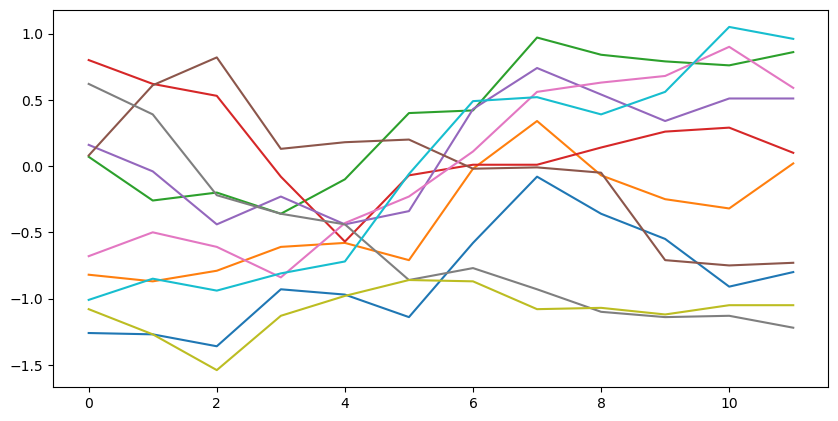

In [26]:
fig = plt.figure(figsize=(10,5), dpi=100)

###
plt.plot(MEI_10yr[:,:]);


# ax1.invert_yaxis()
# ax1.set_yscale("log")

# ax1.legend();

# monthly mean particle lifetime


In [27]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [28]:
Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")    


(7, 21, 24, 10, 12, 10)


In [29]:
#  for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_2/Plot_python/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_2/Plot_python/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:02<00:00,  5.96it/s]


In [30]:
# for 21-km injection

directory2 = '/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line2 in Lines2:
                a2 = line2.split(',')
                data.append(     float(a2[0]))
                data_N.append(   float(a2[1]))
                data_S.append(   float(a2[2]))
                Longitude.append(float(a2[3]))
                Latitude.append( float(a2[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

 25%|██▌       | 3/12 [00:00<00:00, 20.60it/s]

/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:00<00:00, 19.78it/s]


In [31]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
LON[0:4,:,:,:,:,:] = LON1[0:4,:,:,:,:,:]
LAT[0:4,:,:,:,:,:] = LAT1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
LON[4,:,:,:,:,:] = LON2[0,:,:,:,:,:]
LAT[4,:,:,:,:,:] = LAT2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
LON[5:7,:,:,:,:,:] = LON1[4:6,:,:,:,:,:]
LAT[5:7,:,:,:,:,:] = LAT1[4:6,:,:,:,:,:]


In [32]:
lifetime_monthly = np.mean(lifetime[:,:,:,:,:,:], axis=3)
lifetime_AreaMean_monthly = np.mean(lifetime[:,:,:,:,:,:], axis=(1,2,3))

lifetime_monthly.shape, lifetime_AreaMean_monthly.shape


((7, 21, 24, 12, 10), (7, 12, 10))

In [33]:
R1 = []

for iz in range(Nz):
    var1 = lifetime_AreaMean_monthly[iz,:,:].flatten()
    var2 = MEI_10yr[:,:].flatten()
    corr = np.corrcoef(var1, var2)
    R1.append( corr[0,1] )
    
print(R1)
print('')

[0.23509152909116943, -0.0015730460753831097, -0.1420067070655809, -0.3170228099894093, -0.3300778100836581, -0.31384213138787875, -0.24316717052374354]



In [34]:
Correlation1 = np.zeros((Nz, Ny, Nx))

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            
            ###
            var1 = lifetime_monthly[iz,iy,ix,:,:].flatten()
            var2 = MEI_10yr[:,:].flatten()
            corr = np.corrcoef(var1, var2)
            Correlation1[iz,iy,ix] = corr[0,1]
            


In [35]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

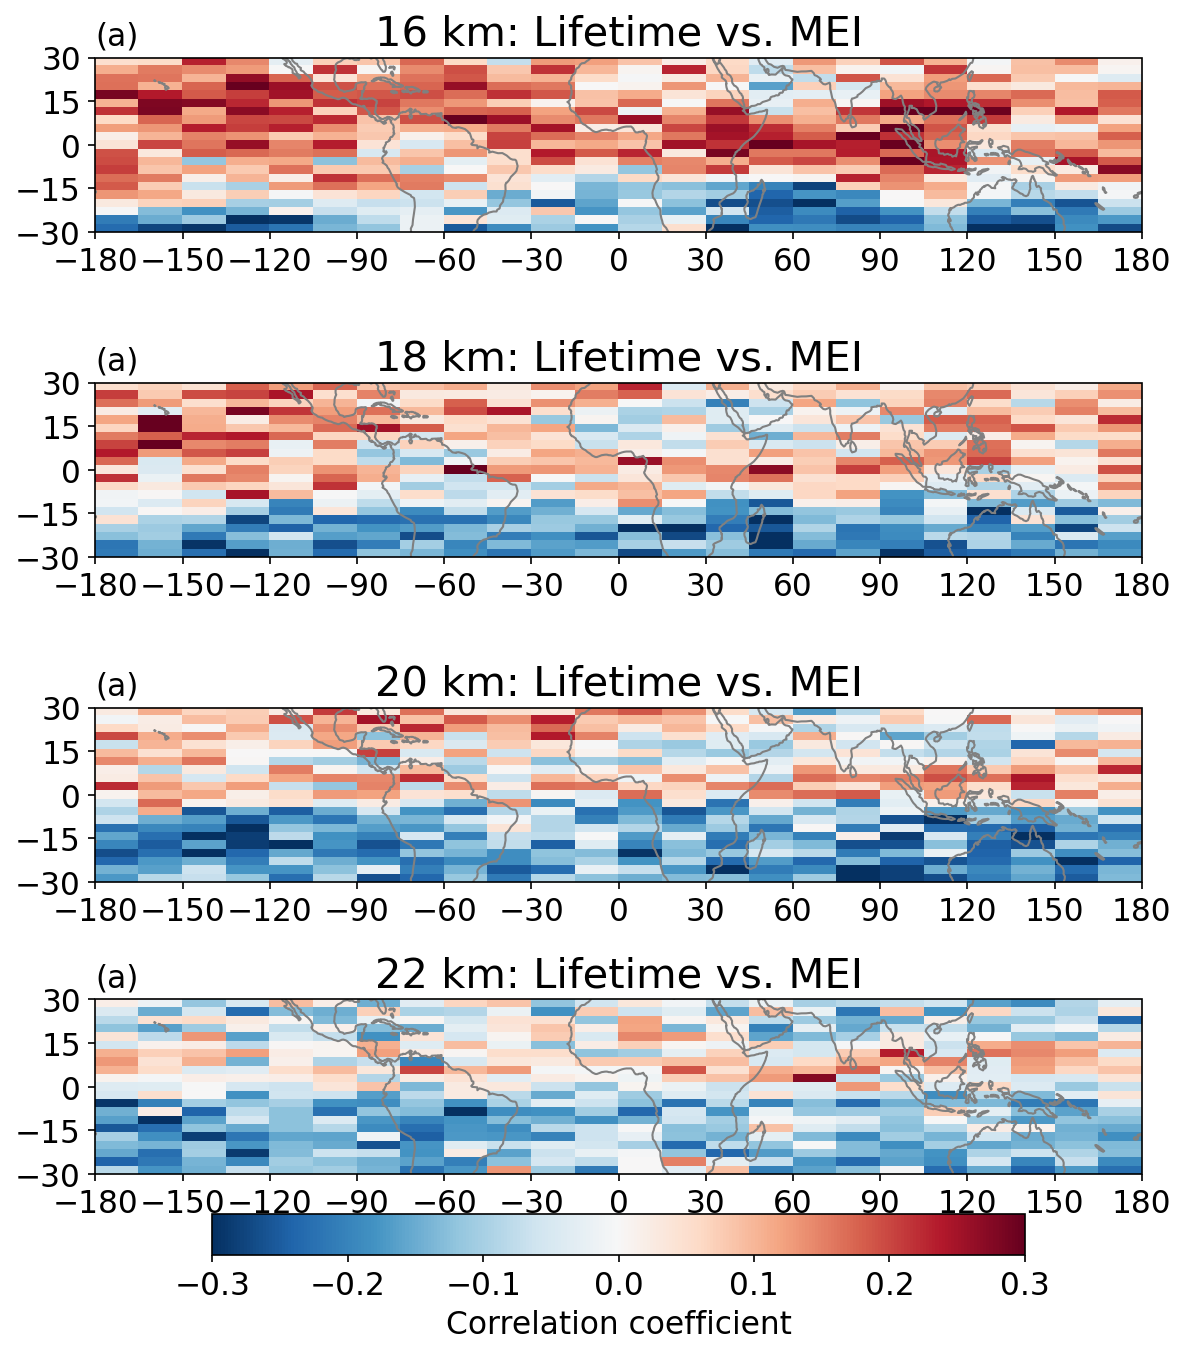

In [36]:

fig = plt.figure(figsize=(9,11), dpi=150)
projection = crs.PlateCarree()

Rmin = -0.3
Rmax = 0.3
    
extent = [-180 , 180 , -30 , 30]

### 16 km
iz=0
ax1 = fig.add_subplot(4,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(Correlation1[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')


ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )
ax1.tick_params(axis='x', labelsize=15 )

ax1.set_title(f"{Height[iz]:.0f} km: Lifetime vs. MEI", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


### 18 km
iz=1
ax2 = fig.add_subplot(4,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(Correlation1[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )
ax2.tick_params(axis='x', labelsize=15 )

ax2.set_title(f"{Height[iz]:.0f} km: Lifetime vs. MEI", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax2.set_title("(a)", loc='left', fontsize=15)



### 20 km
iz=3
ax3 = fig.add_subplot(4,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(Correlation1[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )
ax3.tick_params(axis='x', labelsize=15 )

ax3.set_title(f"{Height[iz]:.0f} km: Lifetime vs. MEI", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax3.set_title("(a)", loc='left', fontsize=15)


### 22 km
iz=5
ax4 = fig.add_subplot(4,1,4, projection=projection)

ax4.set_global()
ax4.set_extent(extent, crs=projection) ## Important
ax4.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax4_pixel = plt.imshow(Correlation1[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax4.tick_params(axis='y', labelsize=15 )
ax4.tick_params(axis='x', labelsize=15 )

ax4.set_title(f"{Height[iz]:.0f} km: Lifetime vs. MEI", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax4.set_title("(a)", loc='left', fontsize=15)


cb4 = plt.colorbar(ax4_pixel, ax=ax4, orientation="horizontal")
cb4.set_label('Correlation coefficient', fontsize=15);
cb4.ax.tick_params(labelsize=15)

In [ ]:
correlation between DJF